# Team members:

In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge ,Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, PolynomialFeatures
from sklearn.metrics import mean_squared_log_error as msle
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
%matplotlib inline

# Loading Data

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


we have to drop the 2 columns 'casual' and 'registerd' from the training dataset as they are not present in the test dataset

In [5]:
train.drop(['casual','registered'],1,inplace=True)

# EDA

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   count       10886 non-null  int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 850.6+ KB


seems like there is no null values

In [7]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,977.000000


seems like there is no abnormal or weird values in the minimum or maximum values

# Data describtion

datetime - hourly date + timestamp

season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 

holiday - whether the day is considered a holiday

workingday - whether the day is neither a weekend nor holiday

weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 

temp - temperature in Celsius

atemp - "feels like" temperature in Celsius

humidity - relative humidity

windspeed - wind speed

casual - number of non-registered user rentals initiated

registered - number of registered user rentals initiated

count - number of total rentals

In [8]:
#from data describtion we can extract categorcal data and numerical data

In [9]:
categorical_cols=['season','holiday','workingday','weather']
numerical_cols=['temp','atemp','humidity','windspeed']
label='count'

# Adding timestamp data

adding month,weekday and hour data

In [10]:
train['datetime'] = pd.to_datetime(train['datetime'])
test['datetime'] = pd.to_datetime(test['datetime'])
train['Month']=pd.DatetimeIndex(train['datetime']).month
test['Month']=pd.DatetimeIndex(test['datetime']).month
train['WeekDay']=pd.DatetimeIndex(train['datetime']).weekday
test['WeekDay']=pd.DatetimeIndex(test['datetime']).weekday
train['Hour']=pd.DatetimeIndex(train['datetime']).hour
test['Hour']=pd.DatetimeIndex(test['datetime']).hour

In [11]:
categorical_cols.extend(['Month','WeekDay','Hour'])

classifying hours based on counts density

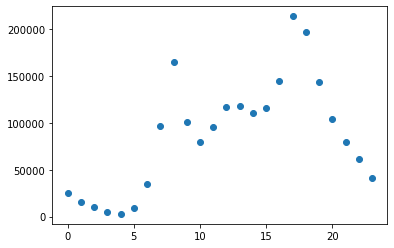

In [12]:
d=train[['Hour',label]].groupby('Hour').sum()
#plt.bar(x=list(d.index),y=list(d['count']),height=2)
d.sort_values(by='count',ascending=False)
plt.scatter(x=d.index,y=d['count'])

In [13]:
high_hours=d[d['count']>=125000].index
high_hours

Int64Index([8, 16, 17, 18, 19], dtype='int64', name='Hour')

In [14]:
low_hours=d[d['count']<=50000].index
low_hours

Int64Index([0, 1, 2, 3, 4, 5, 6, 23], dtype='int64', name='Hour')

In [15]:
med_hours=d[np.logical_and(d['count']>50000,d['count']<125000) ].index
med_hours

Int64Index([7, 9, 10, 11, 12, 13, 14, 15, 20, 21, 22], dtype='int64', name='Hour')

In [16]:
def classify_hours(x,lh=low_hours,mh=med_hours,hh=high_hours):
    if x in lh:
        return 0
    elif x in mh:
        return 1
    elif x in hh:
        return 2

In [17]:
train['Hour']=train['Hour'].apply(classify_hours)

In [18]:
train['Hour']

0        0
1        0
2        0
3        0
4        0
        ..
10881    2
10882    1
10883    1
10884    1
10885    0
Name: Hour, Length: 10886, dtype: int64

# visualizing Catergorical columns

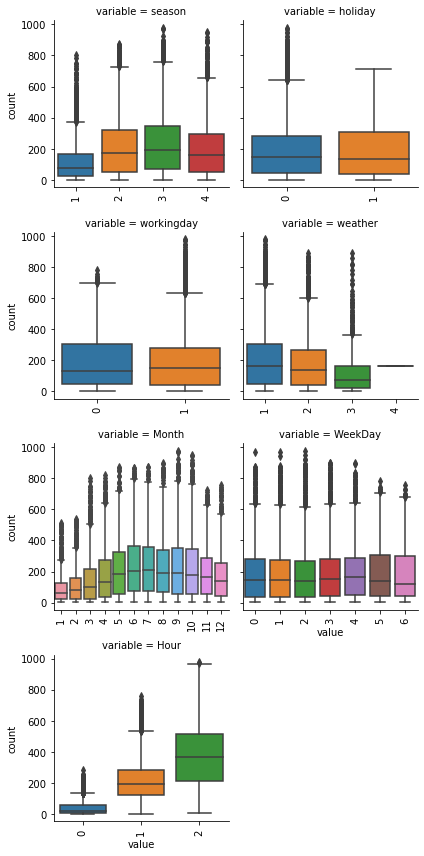

In [20]:
def boxplot(x,y,**kwargs):
    sns.boxplot(x=x,y=y)
    x=plt.xticks(rotation=90)
f=pd.melt(train,id_vars=['count'],value_vars=categorical_cols)
g=sns.FacetGrid(f,col='variable',col_wrap=2,sharex=False)
g.map(boxplot,'value','count')

# visualizing numiric coumns

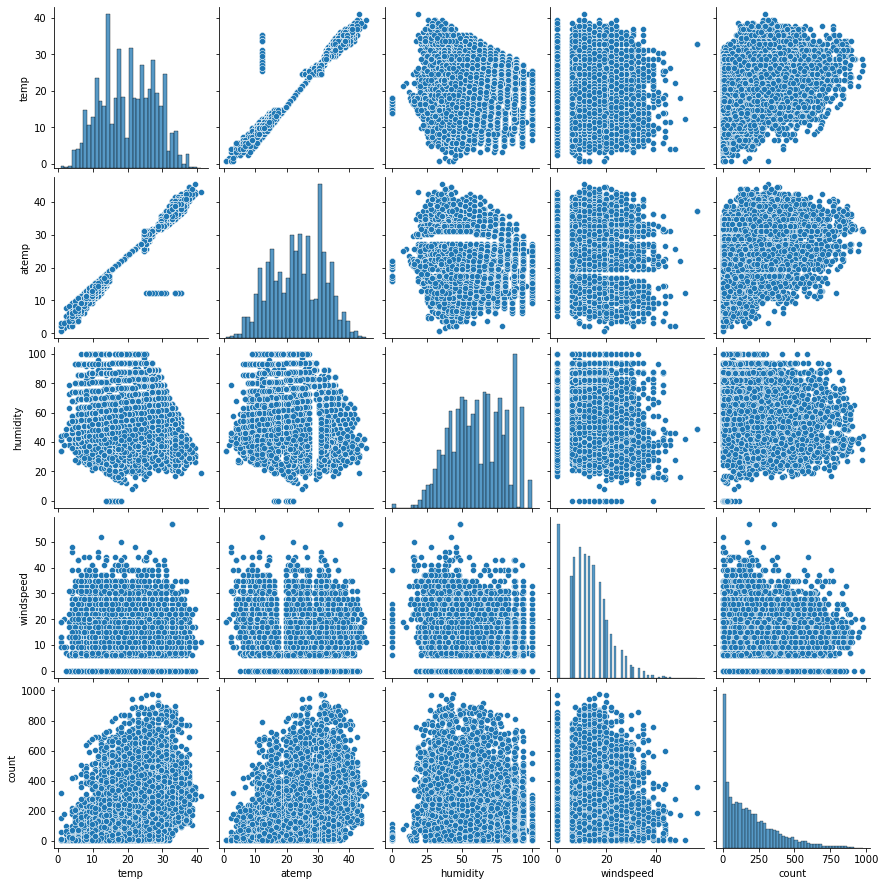

In [21]:
sns.pairplot(train[[*numerical_cols,'count']])

<AxesSubplot:>

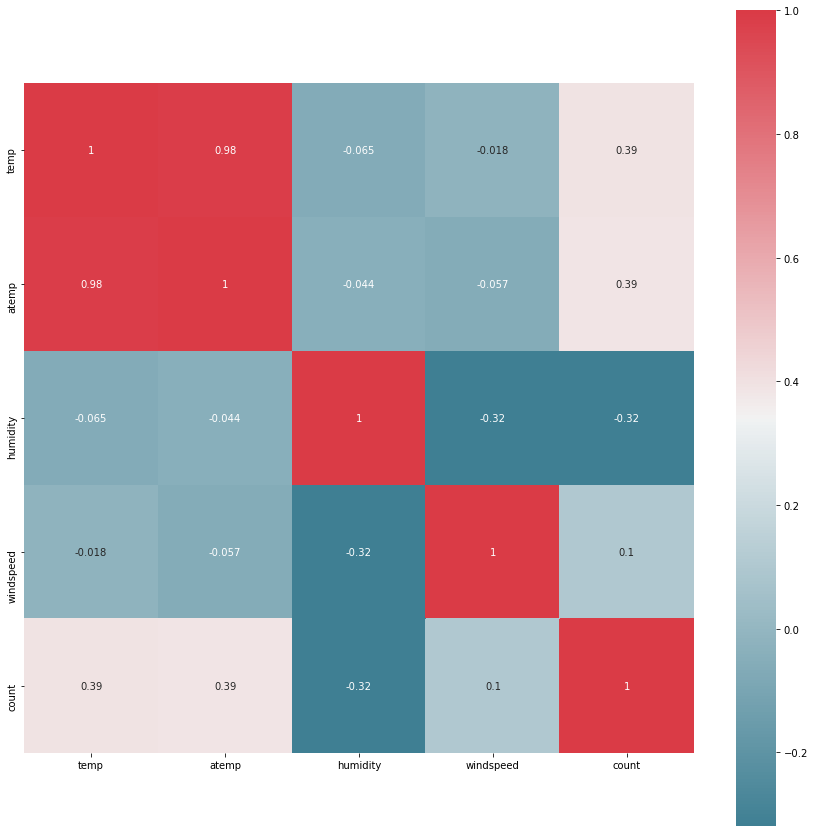

In [24]:
f, ax = plt.subplots(figsize=(15, 15))
corr = train[[*numerical_cols,'count']].corr()
sns.heatmap(corr,cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax, annot = True)

# Transforming Label distribution

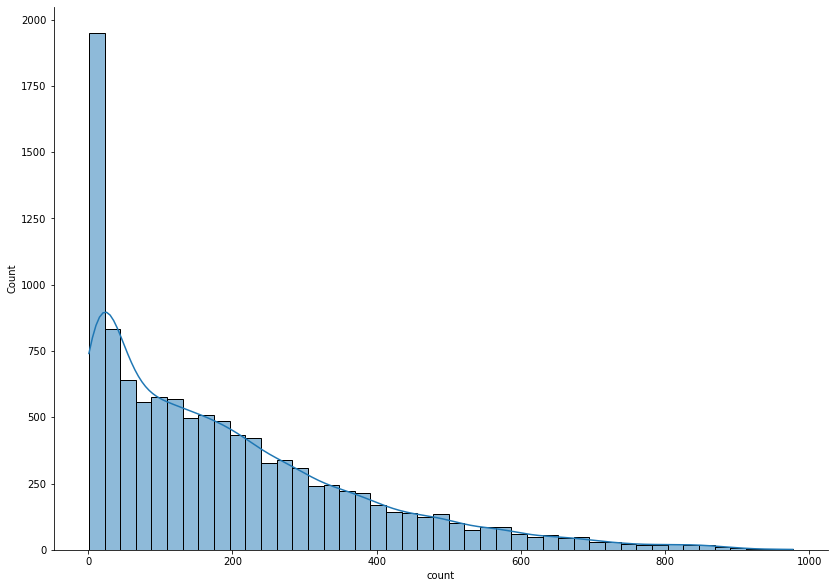

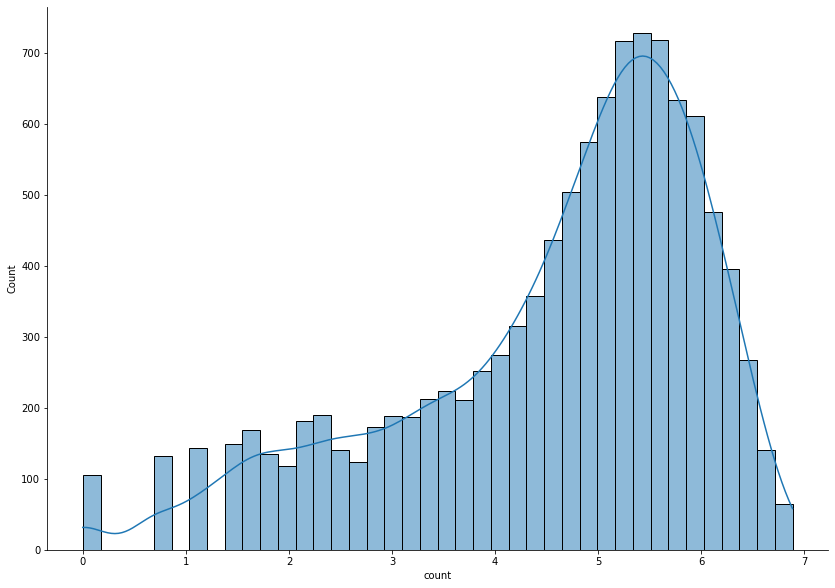

In [26]:
sns.displot(train[label] , kde=True, height=8.27, aspect=11.7/8.27)
sns.displot(np.log(train[label]) , kde=True, height=8.27, aspect=11.7/8.27)

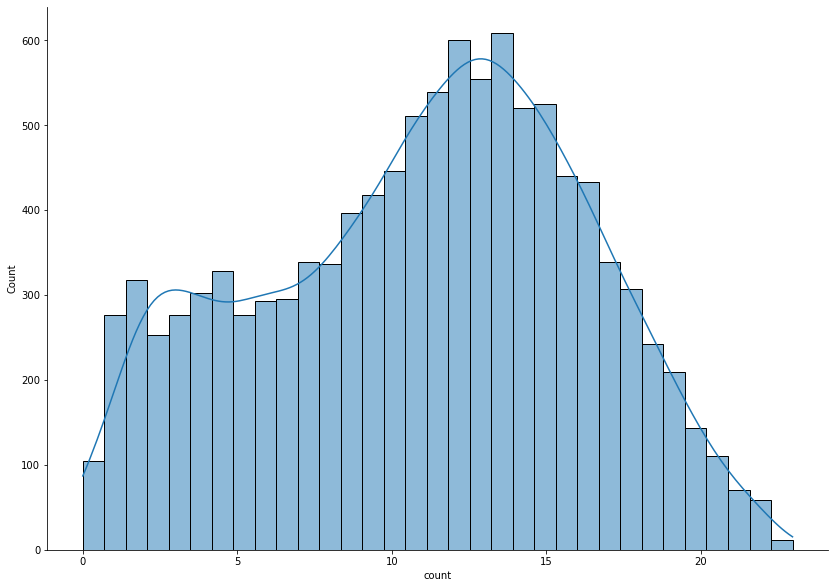

In [27]:
def trans(x,l1=0.3,l2=0):
    if l1!=0:
        return ((x+l2)**l1-1)/l1
    else:
        return np.log(x+l2)
def rev_trans(x,l1=0.3,l2=0):
    return (x*l1+1)**(1/l1)-l2
z=train[label].apply(trans)   
sns.displot(z , kde=True, height=8.27, aspect=11.7/8.27)

In [39]:
#using box cox transform on the label column

In [28]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,Month,WeekDay,Hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,16,1,5,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,40,1,5,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,32,1,5,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,13,1,5,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,1,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,336,12,2,2
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,241,12,2,1
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,168,12,2,1
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,129,12,2,1


In [29]:
train=pd.get_dummies(train,columns=['season','weather','Month','WeekDay'])
test=pd.get_dummies(test,columns=['season','weather','Month','WeekDay'])

In [30]:
train

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,count,Hour,season_1,...,Month_10,Month_11,Month_12,WeekDay_0,WeekDay_1,WeekDay_2,WeekDay_3,WeekDay_4,WeekDay_5,WeekDay_6
0,2011-01-01 00:00:00,0,0,9.84,14.395,81,0.0000,16,0,1,...,0,0,0,0,0,0,0,0,1,0
1,2011-01-01 01:00:00,0,0,9.02,13.635,80,0.0000,40,0,1,...,0,0,0,0,0,0,0,0,1,0
2,2011-01-01 02:00:00,0,0,9.02,13.635,80,0.0000,32,0,1,...,0,0,0,0,0,0,0,0,1,0
3,2011-01-01 03:00:00,0,0,9.84,14.395,75,0.0000,13,0,1,...,0,0,0,0,0,0,0,0,1,0
4,2011-01-01 04:00:00,0,0,9.84,14.395,75,0.0000,1,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,0,1,15.58,19.695,50,26.0027,336,2,0,...,0,0,1,0,0,1,0,0,0,0
10882,2012-12-19 20:00:00,0,1,14.76,17.425,57,15.0013,241,1,0,...,0,0,1,0,0,1,0,0,0,0
10883,2012-12-19 21:00:00,0,1,13.94,15.910,61,15.0013,168,1,0,...,0,0,1,0,0,1,0,0,0,0
10884,2012-12-19 22:00:00,0,1,13.94,17.425,61,6.0032,129,1,0,...,0,0,1,0,0,1,0,0,0,0


In [31]:
x=train.drop(['count','datetime'],1)
y=train['count']
xt,xv,yt,yv=train_test_split(x,y,test_size=0.2,random_state=42)

In [32]:
def redun(x):
    return x

In [33]:
def del_dup_cols(x1,x2):
    x=pd.concat([pd.DataFrame(x1),pd.DataFrame(x2)],axis=0).reset_index(drop=True)
    x=x.T.drop_duplicates().T
    x1_new=x.loc[:len(x1)-1]
    x2_new=x.loc[len(x1):]
    return x1_new,x2_new

In [34]:
def mk_model_RF(xt1,xv1,yt,yv,p,md=None,func1=redun,func2=redun,norm=False,mss=2,n_est=100,al=0):
    
    ytt=yt.apply(func1)
    yvt=yv.apply(func2)
    model=RandomForestRegressor(max_depth=md, random_state=0,min_samples_split=mss,n_estimators=n_est,ccp_alpha=al)
    model.fit(xt1,ytt)
    ypt=np.apply_along_axis(func2,arr=model.predict(xt1),axis=0)
    ypv=np.apply_along_axis(func2,arr=model.predict(xv1),axis=0)
    ypt[ypt<0]=0
    ypv[ypv<0]=0
    print('training r2:',r2_score(yt,ypt))
    print('Validation r2:',r2_score(yv,ypv))
    print('training rmsle:',np.sqrt(msle(yt,ypt)))
    print('validation rmsle:',np.sqrt(msle(yv,ypv)))
    return model

In [35]:
def mk_model_GBR(xt1,xv1,yt,yv,p,lr,func1=redun,func2=redun,mss=2):
    ytt=yt.apply(func1)
    yvt=yv.apply(func2)
    model=GradientBoostingRegressor(random_state=42,learning_rate=lr,min_samples_split=mss)
    model.fit(xt1,ytt)
    ypt=np.apply_along_axis(func2,arr=model.predict(xt1),axis=0)
    ypv=np.apply_along_axis(func2,arr=model.predict(xv1),axis=0)
    ypt[ypt<0]=0
    ypv[ypv<0]=0
    print('training r2:',r2_score(yt,ypt))
    print('Validation r2:',r2_score(yv,ypv))
    print('training rmsle:',np.sqrt(msle(yt,ypt)))
    print('validation rmsle:',np.sqrt(msle(yv,ypv)))
    return model

In [40]:
model=mk_model_RF(xt,xv,yt,yv,1,md=None,func1=trans,func2=rev_trans,norm=False,mss=2,n_est=200,al=0)

training r2: 0.9558811158970114
Validation r2: 0.7337872915755292
training rmsle: 0.3257959747738489
validation rmsle: 0.7637054542656315


In [41]:
mk_model_GBR(xt,xv,yt,yv,1,lr=1,func1=redun,func2=redun,mss=2)

training r2: 0.7823834158030156
Validation r2: 0.6946515671909079
training rmsle: 0.9625422850206351
validation rmsle: 1.0984856988990221


GradientBoostingRegressor(learning_rate=1, random_state=42)